In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [2]:
file_path = '~/Desktop/airbnb_eda(2).csv'

df = pd.read_csv(file_path)

In [3]:
df.head()

,description,host_since,host_is_superhost,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,years_hosted,difference,borough
0,Guest room in a luxury condo with access to al...,2009-06-22,f,2.0,3.0,Waterfront Communities-The Island,43.64080,-79.37673,Private room in rental unit,Private room,...,4.89,4.87,4.90,4.92,4.83,t,2,14.0,0,Old City of Toronto
1,"CN Tower, TIFF Bell Lightbox, Metro Convention...",2010-04-25,f,3.0,8.0,Waterfront Communities-The Island,43.64608,-79.39032,Entire condo,Entire home/apt,...,4.78,4.63,4.75,4.85,4.65,f,3,13.0,0,Old City of Toronto
2,---------------------Renovated and Newly Furn...,2010-07-20,t,4.0,6.0,South Parkdale,43.63539,-79.44010,Entire home,Entire home/apt,...,4.66,4.95,4.96,4.57,4.68,f,4,13.0,0,Old City of Toronto
3,"Brand new, fully furnished studio basement apa...",2010-05-04,f,1.0,1.0,South Riverdale,43.66884,-79.32725,Entire rental unit,Entire home/apt,...,4.83,5.00,5.00,4.83,4.83,f,1,13.0,0,Old City of Toronto
4,Highly walkable neighborhood. Close to the lak...,2010-07-21,t,1.0,4.0,The Beaches,43.67239,-79.28858,Entire rental unit,Entire home/apt,...,4.25,5.00,4.50,5.00,4.50,f,1,13.0,0,Old City of Toronto


In [4]:
df.shape

(16181, 35)

In [5]:
df.dtypes

description                        object
host_since                         object
host_is_superhost                  object
host_listings_count               float64
host_total_listings_count         float64
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
amenities                          object
price                             float64
minimum_nights                      int64
maximum_nights                      int64
has_availability                   object
availability_365                    int64
number_of_reviews                   int64
number_of_reviews_ltm               int64
number_of_reviews_l30d              int64
review_scores_rating              

In [6]:
df.drop(columns=['description'], inplace=True)

In [7]:
data_types = df.dtypes

categorical_columns = data_types[data_types == 'object'].index.tolist()

print("Categorical columns:", categorical_columns)

Categorical columns: ['host_since', 'host_is_superhost', 'neighbourhood_cleansed', 'property_type', 'room_type', 'amenities', 'has_availability', 'instant_bookable', 'borough']


In [8]:
numeric_columns = data_types[data_types != 'object'].index.tolist()

print("Numeric Columns:", numeric_columns)

Numeric Columns: ['host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'years_hosted', 'difference']


In [9]:
df.host_since.value_counts()

2011-07-06    143
2020-03-19     75
2013-11-23     71
2020-01-16     60
2022-05-06     58
             ... 
2011-01-31      1
2020-07-10      1
2019-05-17      1
2019-05-16      1
2011-07-03      1
Name: host_since, Length: 3699, dtype: int64

In [10]:
df['host_since'] = pd.to_datetime(df['host_since'])

# Calculate current year
current_year = pd.Timestamp.now().year

# Calculate number of years since host started hosting
df['years_as_host'] = current_year - df['host_since'].dt.year

print(df['years_as_host'])

0        15
1        14
2        14
3        14
4        14
         ..
16176     1
16177     1
16178     2
16179    10
16180     3
Name: years_as_host, Length: 16181, dtype: int64


In [11]:
df['years_as_host'].value_counts()

8     2112
9     2086
7     1618
5     1579
2     1502
6     1448
10    1433
11    1067
4      878
3      762
12     662
13     506
1      358
14     128
15      42
Name: years_as_host, dtype: int64

In [12]:
df.drop(columns=['host_since'], inplace=True)

In [13]:
df['host_is_superhost'].unique()

array(['f', 't'], dtype=object)

In [14]:
df['property_type'].unique()

array(['Private room in rental unit', 'Entire condo', 'Entire home',
       'Entire rental unit', 'Entire loft', 'Private room in condo',
       'Private room in home', 'Entire serviced apartment',
       'Entire guest suite', 'Private room in guest suite',
       'Shared room in rental unit', 'Private room in tiny home',
       'Private room in townhouse', 'Entire guesthouse', 'Private room',
       'Entire bungalow', 'Private room in cottage',
       'Private room in loft', 'Entire townhouse',
       'Private room in guesthouse', 'Private room in bungalow',
       'Shared room in condo', 'Entire place', 'Entire villa',
       'Private room in bed and breakfast', 'Shared room in home',
       'Private room in barn', 'Shared room in townhouse',
       'Shared room in bed and breakfast', 'Private room in floor',
       'Tiny home', 'Private room in villa', 'Private room in hostel',
       'Shared room in hostel', 'Shared room in bungalow',
       'Private room in castle', 'Entire cottag

In [15]:
property_description = ['private', 'entire', 'shared', 'other']

In [16]:
df['property_category'] = df['property_type'].apply(lambda x: next((word for word in property_description if word in x.lower()), 'other'))
print(df[['property_type', 'property_category']])

                     property_type property_category
0      Private room in rental unit           private
1                     Entire condo            entire
2                      Entire home            entire
3               Entire rental unit            entire
4               Entire rental unit            entire
...                            ...               ...
16176         Private room in home           private
16177                  Entire home            entire
16178  Private room in rental unit           private
16179         Private room in home           private
16180           Entire rental unit            entire

[16181 rows x 2 columns]


In [17]:
df.property_category.value_counts()

entire     11221
private     4772
shared       106
other         82
Name: property_category, dtype: int64

In [18]:
property_description2 = ['rental unit','condo','home','loft','apartment','suite','townhouse','guesthouse','bungalow','cottage','villa','barn','hostel','hotel','farm','boat','vacation home']

In [19]:
df['property_category2'] = df['property_type'].apply(lambda x: next((word for word in property_description2 if word in x.lower()), 'other'))

print(df[['property_type', 'property_category', 'property_category2']])

                     property_type property_category property_category2
0      Private room in rental unit           private        rental unit
1                     Entire condo            entire              condo
2                      Entire home            entire               home
3               Entire rental unit            entire        rental unit
4               Entire rental unit            entire        rental unit
...                            ...               ...                ...
16176         Private room in home           private               home
16177                  Entire home            entire               home
16178  Private room in rental unit           private        rental unit
16179         Private room in home           private               home
16180           Entire rental unit            entire        rental unit

[16181 rows x 3 columns]


In [20]:
df.property_category2.value_counts()

home           4852
rental unit    4469
condo          4171
suite           935
townhouse       561
bungalow        510
loft            264
guesthouse       90
other            88
villa            81
hotel            66
apartment        53
hostel           21
cottage           9
barn              5
boat              4
farm              2
Name: property_category2, dtype: int64

In [21]:
pd.DataFrame(df['property_type'].value_counts().head(30))

,property_type
Entire condo,3642
Entire rental unit,3602
Private room in home,2438
Entire home,2364
Private room in rental unit,835
Entire guest suite,784
Private room in condo,518
Private room in bungalow,317
Private room in townhouse,316
Entire loft,241


In [22]:
df['property_type'].replace({'Private room in bed and breakfast': 'Room in hotel', 
                             'Private room': 'Other',
                            'Private room in casa particular':'Other'}, inplace=True)
pd.DataFrame(df['property_type'].value_counts().head(30))

,property_type
Entire condo,3642
Entire rental unit,3602
Private room in home,2438
Entire home,2364
Private room in rental unit,835
Entire guest suite,784
Private room in condo,518
Private room in bungalow,317
Private room in townhouse,316
Entire loft,241


In [23]:

df['property_category2'].replace({'townhouse': 'home', 
                             'bungalow': 'home',
                            'guesthouse':'home',
                                 'hostel':'hotel/hostel',
                                 'hotel':'hotel/hostel',
                                'suite':'hotel/hostel',
                                 'barn': 'farm',
                                 'boat': 'unique', 
                                 'villa': 'unique',
                                  'farm': 'unique',
                                  'cottage': 'unique'
                                 }, inplace=True)
pd.DataFrame(df['property_category2'].value_counts().head(30))

,property_category2
home,6013
rental unit,4469
condo,4171
hotel/hostel,1022
loft,264
unique,96
other,88
apartment,53
farm,5


In [24]:
df['property_category2'].replace({'condo': 'condo/apartment', 
                                  'apartment':'condo/apartment',
                                   }, inplace=True)
pd.DataFrame(df['property_category2'].value_counts().head(30))

,property_category2
home,6013
rental unit,4469
condo/apartment,4224
hotel/hostel,1022
loft,264
unique,96
other,88
farm,5


In [25]:
#Remove unidentified other column 
df = df[df['property_category2'] != 'other']


In [26]:
df['property_type_cleansed'] = df['property_category'] + ' ' + df['property_category2']
df['property_type_cleansed'].head()

0       private rental unit
1    entire condo/apartment
2               entire home
3        entire rental unit
4        entire rental unit
Name: property_type_cleansed, dtype: object

In [27]:
df['property_type_cleansed'].unique()

array(['private rental unit', 'entire condo/apartment', 'entire home',
       'entire rental unit', 'entire loft', 'private condo/apartment',
       'private home', 'entire hotel/hostel', 'private hotel/hostel',
       'shared rental unit', 'private unique', 'private loft',
       'shared condo/apartment', 'entire unique', 'shared home',
       'private farm', 'other home', 'shared hotel/hostel', 'shared loft',
       'other hotel/hostel', 'shared unique', 'other unique'],
      dtype=object)

In [28]:
df['property_type_cleansed'].value_counts()

entire condo/apartment     3689
entire rental unit         3602
private home               3097
entire home                2874
private rental unit         835
entire hotel/hostel         784
private condo/apartment     524
entire loft                 241
private hotel/hostel        151
private unique               77
other hotel/hostel           66
shared home                  35
shared rental unit           32
shared hotel/hostel          21
private loft                 21
entire unique                13
shared condo/apartment       11
other home                    7
private farm                  5
shared unique                 3
other unique                  3
shared loft                   2
Name: property_type_cleansed, dtype: int64

In [29]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [30]:
df['room_type'].value_counts()

Entire home/apt    11214
Private room        4774
Shared room          104
Hotel room             1
Name: room_type, dtype: int64

In [31]:
df['neighbourhood_cleansed'].value_counts()

Waterfront Communities-The Island    2773
Niagara                               652
Kensington-Chinatown                  633
Annex                                 531
Trinity-Bellwoods                     480
                                     ... 
Forest Hill North                      14
Morningside                            14
Humber Summit                          12
Elms-Old Rexdale                       11
Kingsway South                         10
Name: neighbourhood_cleansed, Length: 140, dtype: int64

In [32]:
counts_under_50 = (df['neighbourhood_cleansed'].value_counts() < 50).sum()
print("counts under 50:", counts_under_50)
print("total neighbourhoods:", len(df['neighbourhood_cleansed'].unique()))

counts under 50: 65
total neighbourhoods: 140


In [33]:
print(len(df['neighbourhood_cleansed']))
print(len(df['borough']))

16093
16093


In [34]:
df.borough.unique()

array(['Old City of Toronto', 'Scarborough', 'Downtown Toronto',
       'North York', 'York', 'Midtown Toronto', 'East York', 'Etobicoke'],
      dtype=object)

In [35]:
df['amenities']

0        ["Wifi", "Gym", "Pool", "Free parking on premi...
1        ["Oven", "Wifi", "Dishwasher", "Central air co...
2        ["Oven", "Wifi", "Dishwasher", "Outdoor dining...
3        ["Oven", "Baking sheet", "Public or shared bea...
4        ["Oven", "Baking sheet", "Dishwasher", "Public...
                               ...                        
16176    ["Wifi", "Keypad", "Kitchen", "Washer", "Free ...
16177    ["Oven", "Wifi", "Dishwasher", "Backyard", "TV...
16178    ["Wifi", "Outdoor dining area", "TV", "Lockbox...
16179    ["Baking sheet", "Wifi", "Dishwasher", "Backya...
16180    ["Wifi", "TV", "Coffee maker", "Carbon monoxid...
Name: amenities, Length: 16093, dtype: object

In [36]:
import pandas as pd
from collections import Counter

# Create an empty Counter to store the counts
amenities_count = Counter()

# Iterate over each row in the 'amenities' column
for amenities_list in df['amenities']:
    # Convert the string representation of the list to an actual list
    amenities = eval(amenities_list)
    # Update the Counter with the amenities in the current row
    amenities_count.update(amenities)

# Convert the Counter to a DataFrame
amenities_df = pd.DataFrame.from_dict(amenities_count, orient='index', columns=['Count'])

print(amenities_df.sort_values(by='Count', ascending=False))

                                           Count
Smoke alarm                                15500
Kitchen                                    14964
Wifi                                       14420
Essentials                                 13977
Carbon monoxide alarm                      13744
...                                          ...
Outdoor pool - rooftop                         1
43" HDTV with Amazon Prime Video, Fire TV      1
GE Cafe' stainless steel gas stove             1
GE Cafe' refrigerator                          1
Samasung stainless steel single oven           1

[4175 rows x 1 columns]


In [37]:
unique_counts = amenities_df['Count'].nunique()
print("Number of unique counts:", unique_counts)

Number of unique counts: 259


In [38]:
print(amenities_df.sort_values(by='Count', ascending=False).head(70))

                            Count
Smoke alarm                 15500
Kitchen                     14964
Wifi                        14420
Essentials                  13977
Carbon monoxide alarm       13744
...                           ...
Clothing storage: closet     1841
Laundromat nearby            1800
Host greets you              1757
Backyard                     1744
Books and reading material   1717

[70 rows x 1 columns]


In [39]:
df.dtypes

host_is_superhost                  object
host_listings_count               float64
host_total_listings_count         float64
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
amenities                          object
price                             float64
minimum_nights                      int64
maximum_nights                      int64
has_availability                   object
availability_365                    int64
number_of_reviews                   int64
number_of_reviews_ltm               int64
number_of_reviews_l30d              int64
review_scores_rating              float64
review_scores_accuracy            float64
review_scores_cleanliness         

In [40]:
new_df = df.drop(columns=['neighbourhood_cleansed', 'property_category', 'property_category2','property_type', 'amenities','difference', 'years_hosted'])

In [41]:
new_df.dtypes

host_is_superhost                  object
host_listings_count               float64
host_total_listings_count         float64
latitude                          float64
longitude                         float64
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
price                             float64
minimum_nights                      int64
maximum_nights                      int64
has_availability                   object
availability_365                    int64
number_of_reviews                   int64
number_of_reviews_ltm               int64
number_of_reviews_l30d              int64
review_scores_rating              float64
review_scores_accuracy            float64
review_scores_cleanliness         float64
review_scores_checkin             float64
review_scores_communication       float64
review_scores_location            

In [42]:
names = new_df.columns
names

Index(['host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'borough', 'years_as_host',
       'property_type_cleansed'],
      dtype='object')

In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [44]:
numeric_features = ['host_listings_count', 'host_total_listings_count',
                    'latitude', 'longitude', 'accommodates', 'bathrooms',
                    'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
                    'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
                    'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy',
                    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                    'review_scores_location', 'review_scores_value', 'calculated_host_listings_count',
                    'years_as_host']

categorical_features = ['host_is_superhost', 'room_type', 'has_availability', 'instant_bookable', 'borough',
                        'property_type_cleansed']

In [45]:
# preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


scaled_array = preprocessor.fit_transform(new_df)

column_names1 = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)


column_names2 = numeric_features + list(column_names1)


scaled_df = pd.DataFrame(scaled_array, columns=column_names2)


In [46]:
# Now 'scaled_df' contains your scaled DataFrame with one-hot encoded categorical variables
scaled_df.dtypes

host_listings_count                           float64
host_total_listings_count                     float64
latitude                                      float64
longitude                                     float64
accommodates                                  float64
                                               ...   
property_type_cleansed_shared home            float64
property_type_cleansed_shared hotel/hostel    float64
property_type_cleansed_shared loft            float64
property_type_cleansed_shared rental unit     float64
property_type_cleansed_shared unique          float64
Length: 64, dtype: object

In [47]:
print(len(scaled_df.columns))

64


In [48]:
from sklearn.model_selection import train_test_split

X = scaled_df.drop(columns=['price'])
y = scaled_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
#Applying the Machine Learning Models


In [50]:
#Model 1 - Linear Regression

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train, y_train)

y_pred_lin = lin_reg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lin)
print("Mean Squared error", mse)

Mean Squared error 0.5458798497959574


In [51]:
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Compute R-squared
r2 = r2_score(y_test, y_pred_lin)
print("R-squared:", r2)

# Compute Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_lin)
print("Mean Absolute Error:", mae)


R-squared: 0.4282670644612102
Mean Absolute Error: 0.5395339218617201


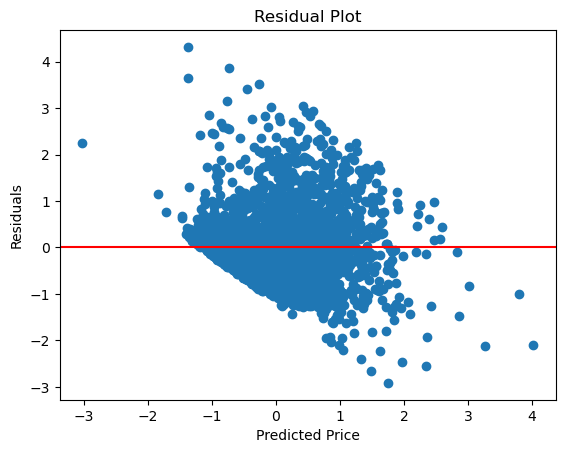

In [52]:
residuals = y_test - y_pred_lin
plt.scatter(y_pred_lin, residuals)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [53]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1, 10, 100]}

ridge = Ridge()

grid_search = GridSearchCV(ridge, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_ridge = grid_search.best_estimator_

y_pred_ridge = best_ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Best Ridge Model MSE:", mse_ridge)


Best Ridge Model MSE: 0.5458672580674613


In [54]:
from sklearn.linear_model import Lasso

lasso = Lasso()

grid_search_lasso = GridSearchCV(lasso, param_grid, cv=5, 
                                scoring = 'neg_mean_squared_error')

grid_search_lasso.fit(X_train, y_train)

best_lasso = grid_search_lasso.best_estimator_

y_pred_lasso = best_lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Best Lasso Model MSE:", mse_lasso)

Best Lasso Model MSE: 0.6524693845701761


In [55]:
#Model 2 - Random Forest

from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

# Get the best Random Forest model
best_rf = grid_search_rf.best_estimator_

# Evaluate the best Random Forest model
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Best Random Forest Model MSE:", mse_rf)


Best Random Forest Model MSE: 0.42791340615998863


In [56]:
# Compute R-squared for RF
r2 = r2_score(y_test, y_pred_rf)
print("R-squared:", r2)

# Compute Mean Absolute Error for RF
mae = mean_absolute_error(y_test, y_pred_rf)
print("Mean Absolute Error:", mae)

R-squared: 0.5518204455583029
Mean Absolute Error: 0.4587380751884295


In [57]:
feature_importance = best_rf.feature_importances_

# Create a DataFrame to display feature importance scores
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance scores
print(importance_df)

                                 Feature    Importance
4                           accommodates  2.679723e-01
2                               latitude  8.176723e-02
5                              bathrooms  7.748748e-02
3                              longitude  6.434140e-02
10                      availability_365  5.941202e-02
..                                   ...           ...
51   property_type_cleansed_private farm  9.398851e-08
49   property_type_cleansed_other unique  0.000000e+00
60    property_type_cleansed_shared loft  0.000000e+00
26                  room_type_Hotel room  0.000000e+00
62  property_type_cleansed_shared unique  0.000000e+00

[63 rows x 2 columns]


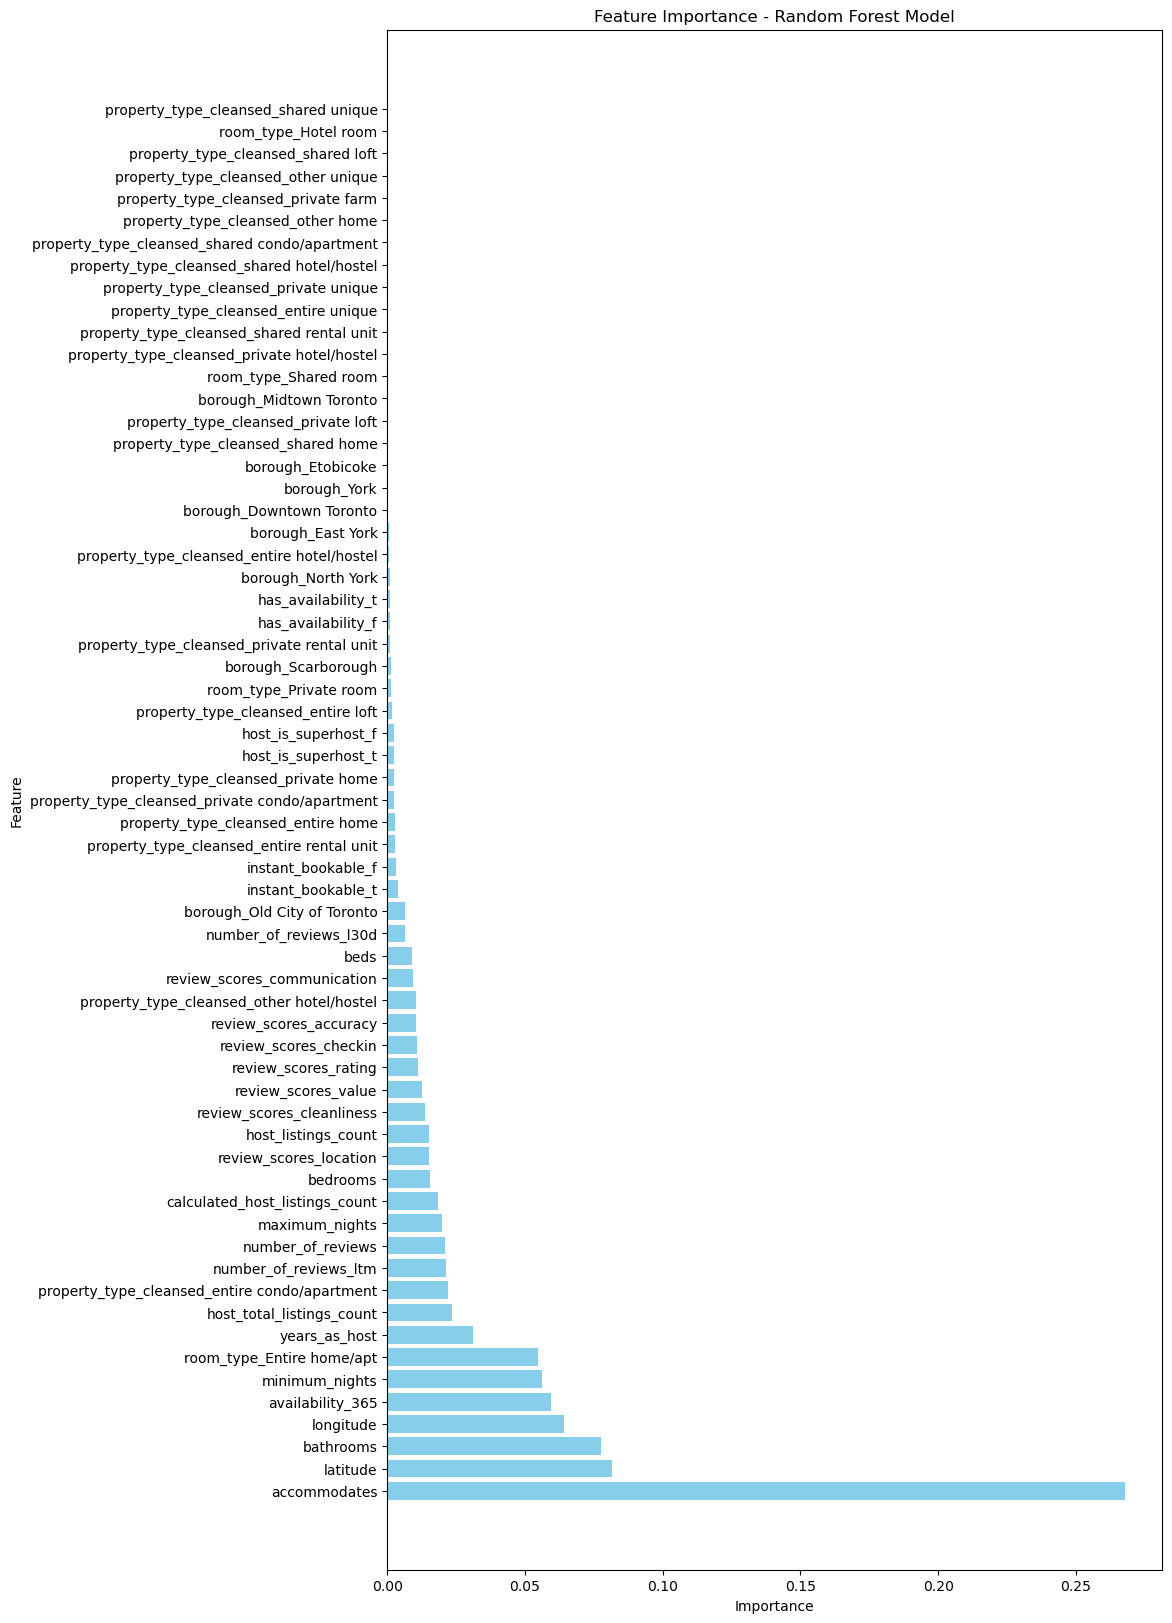

In [58]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 20))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest Model')
plt.show()

In [59]:
# Retrieve coefficients and corresponding feature names
lasso_coefficients = best_lasso.coef_
feature_names = X.columns

# Create a DataFrame to display feature coefficients
lasso_coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})
lasso_coefficients_df = lasso_coefficients_df.sort_values(by='Coefficient', ascending=False)

# Print or visualize the most important features
print(lasso_coefficients_df.head(10))  # Display the top 10 features with the highest coefficients

                                          Feature  Coefficient
4                                    accommodates     0.386392
5                                       bathrooms     0.096200
6                                        bedrooms     0.019740
0                             host_listings_count     0.000000
41  property_type_cleansed_entire condo/apartment     0.000000
46           property_type_cleansed_entire unique     0.000000
45      property_type_cleansed_entire rental unit     0.000000
44             property_type_cleansed_entire loft     0.000000
43     property_type_cleansed_entire hotel/hostel    -0.000000
42             property_type_cleansed_entire home     0.000000


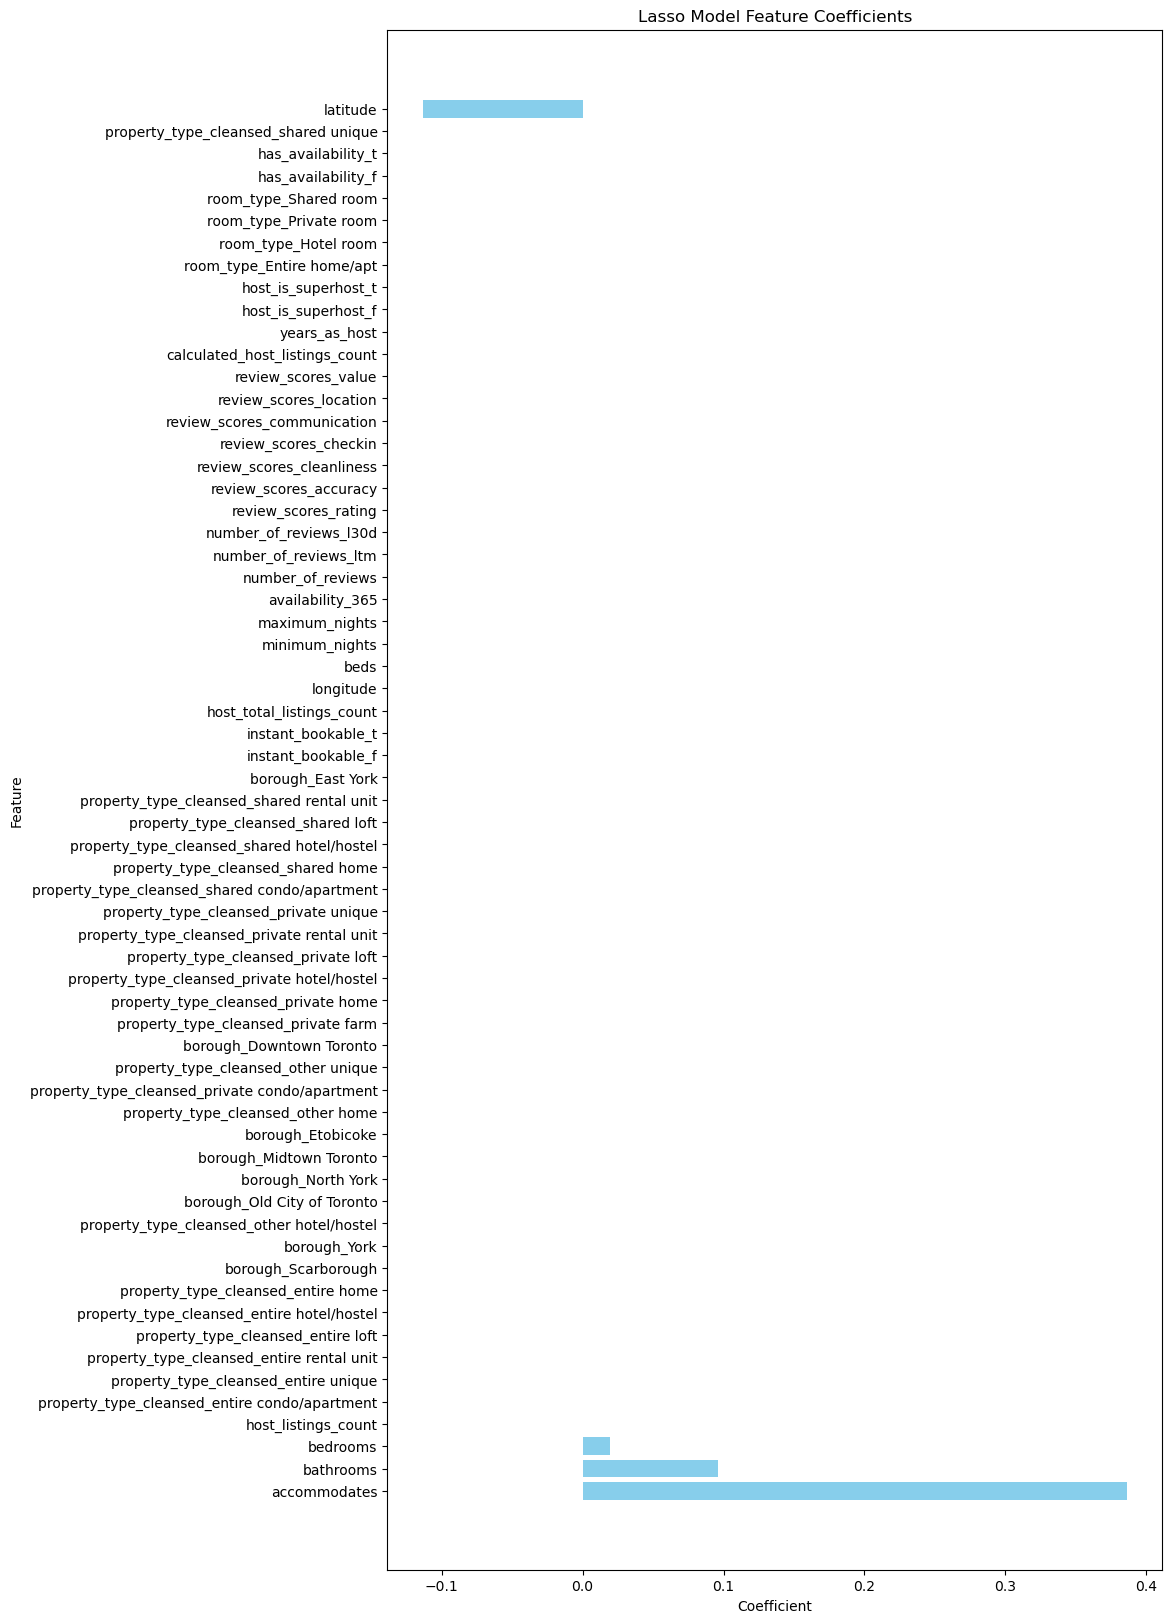

In [60]:
plt.figure(figsize=(10, 20))
plt.barh(lasso_coefficients_df['Feature'], lasso_coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Lasso Model Feature Coefficients')
plt.show()

In [61]:
#The best performing model is the Random Forest Model

In [62]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

numeric_transformer = "passthrough"

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

transformed_data = preprocessor.fit_transform(new_df)



numeric_column_names = numeric_features
categorical_column_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
column_names = numeric_column_names + list(categorical_column_names)

transformed_df = pd.DataFrame(transformed_data, columns=column_names)

In [63]:
X = transformed_df.drop(columns=['price'])
y = transformed_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
rf_2 = RandomForestRegressor(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search_rf_2 = GridSearchCV(rf_2, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf_2.fit(X_train, y_train)

# Get the best Random Forest model
best_rf_2 = grid_search_rf_2.best_estimator_

# Evaluate the best Random Forest model
y_pred_rf_2 = best_rf_2.predict(X_test)
mse_rf_2 = mean_squared_error(y_test, y_pred_rf_2)
print("Best Random Forest Model MSE:", mse_rf_2)

Best Random Forest Model MSE: 3227.8187213581746


In [65]:
# Compute R-squared for RF
rf2_r2 = r2_score(y_test, y_pred_rf_2)
print("R-squared:", rf2_r2)

# Compute Mean Absolute Error for RF
rf2_mae = mean_absolute_error(y_test, y_pred_rf_2)
print("Mean Absolute Error:", rf2_mae)

R-squared: 0.5520419259035176
Mean Absolute Error: 39.843021907933604


In [67]:
rf_3 = RandomForestRegressor(max_depth=2, random_state=42)


rf_3.fit(X_train, y_train)


y_pred_rf_3 = rf_3.predict(X_test)

# Compute R-squared for RF
rf3_r2 = r2_score(y_test, y_pred_rf_3)
print("R-squared:", rf3_r2)

# Compute Mean Absolute Error for RF
rf3_mae = mean_absolute_error(y_test, y_pred_rf_3)
print("Mean Absolute Error:", rf3_mae)



R-squared: 0.30458910596373046
Mean Absolute Error: 53.06985544361114


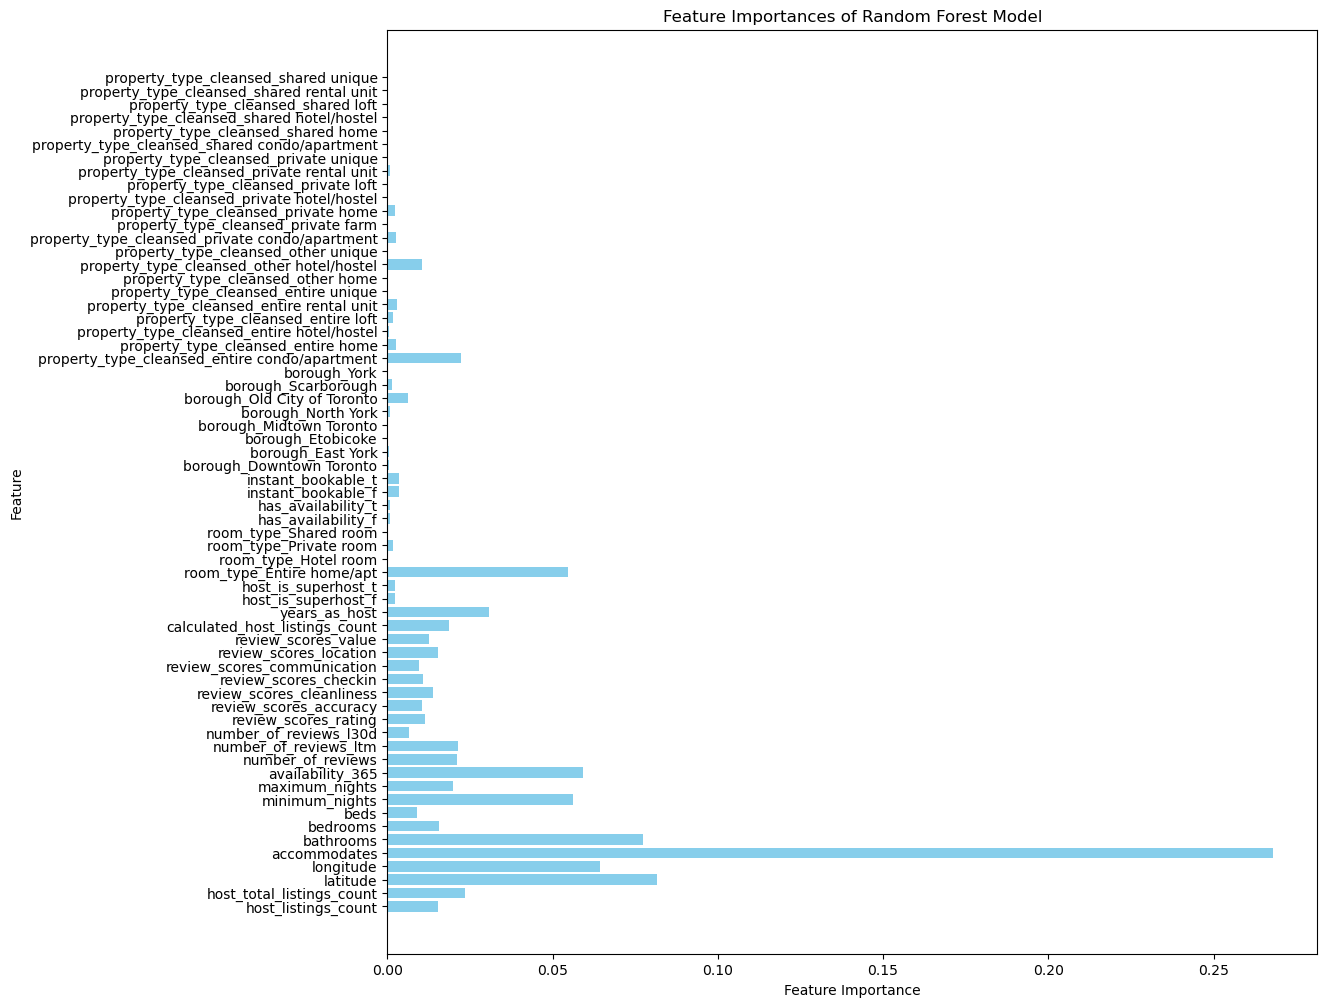

In [77]:
feature_importance_rf_2 = best_rf_2.feature_importances_

plt.figure(figsize=(12, 12))
plt.barh(X_train.columns, feature_importance_rf_2, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of Random Forest Model')
plt.show()

In [78]:
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_rf_2
})

feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances in a table
print("Top 10 Feature Importances from Random Forest Model - Model 1:")
print(feature_importance_df_sorted.head(10))

Top 10 Feature Importances from Random Forest Model - Model 1:
                                          Feature  Importance
4                                    accommodates    0.268000
2                                        latitude    0.081711
5                                       bathrooms    0.077488
3                                       longitude    0.064219
10                               availability_365    0.059364
8                                  minimum_nights    0.056243
25                      room_type_Entire home/apt    0.054655
22                                  years_as_host    0.030805
1                       host_total_listings_count    0.023604
41  property_type_cleansed_entire condo/apartment    0.022159


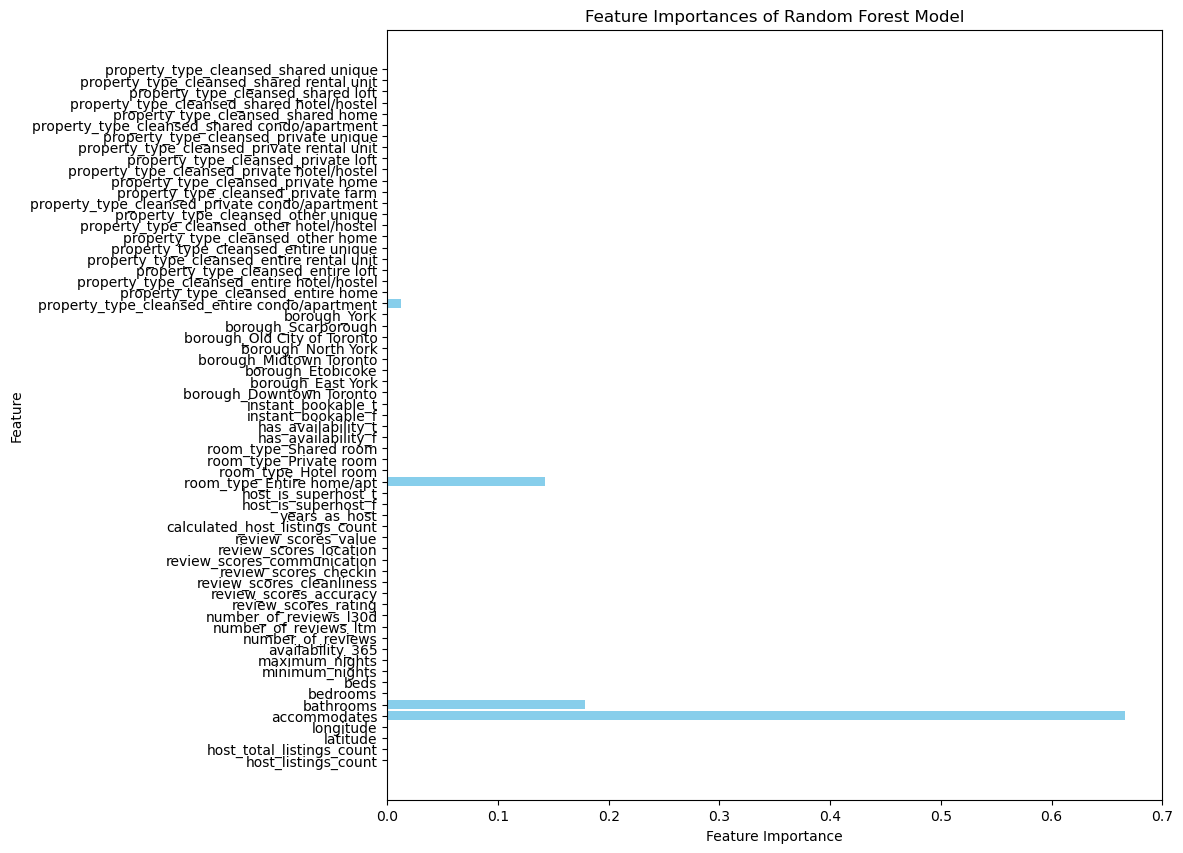

In [75]:
feature_importance_rf_3 = rf_3.feature_importances_

plt.figure(figsize=(10, 10))
plt.barh(X_train.columns, feature_importance_rf_3, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of Random Forest Model')
plt.show()

In [76]:
feature_importance_df_3 = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_rf_3
})

feature_importance_df_sorted = feature_importance_df_3.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances in a table
print(feature_importance_df_sorted.head(10))

                                          Feature  Importance
4                                    accommodates    0.666718
5                                       bathrooms    0.178214
25                      room_type_Entire home/apt    0.142590
41  property_type_cleansed_entire condo/apartment    0.012478
0                             host_listings_count    0.000000
45      property_type_cleansed_entire rental unit    0.000000
44             property_type_cleansed_entire loft    0.000000
43     property_type_cleansed_entire hotel/hostel    0.000000
42             property_type_cleansed_entire home    0.000000
39                            borough_Scarborough    0.000000
